Logistic Regression Model Performance:
Accuracy: 0.9736842105263158
Precision: 0.9742063492063492
Recall: 0.9697019325253848
F1 Score: 0.97186343068696
ROC AUC Score: 0.99737962659679

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Model Performance:
Accuracy: 0.956140350877193
Precision: 0.9516233766233766
Recall: 0.9556174254831313
F1 Score: 0.9535338713621913
ROC AUC Score: 0.9963969865705863

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95      

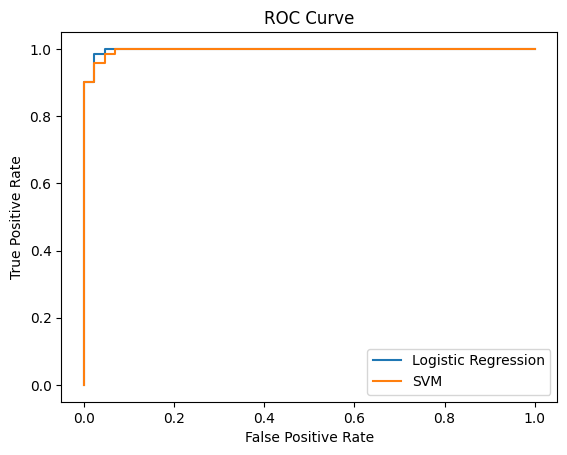

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer(as_frame=True)
df = cancer_data.frame

# Data Preprocessing
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))

# Convert scaled features back to DataFrame and add target
scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
scaled_df['target'] = df['target']

# Separate features and target
X = scaled_df.drop(columns='target')
y = scaled_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# SVM
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='macro'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg, average='macro'))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Evaluate SVM
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))
print("ROC AUC Score:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
